In [105]:
import numpy as np 
import pandas as pd

In [106]:
df=pd.read_csv(r"C:\Users\ankit\OneDrive\Desktop\Mobile Price Range Prediction Project\dataset.csv")

In [107]:
print(df.head(5))

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

In [108]:
input_data = np.array([['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory',
                        'mobile_wt', 'mobile_depth', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',
                        'three_g', 'touch_screen', 'wifi']])

In [109]:
x=df.iloc[:,:20]
y=df['price_range']

In [110]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [111]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [112]:
from sklearn.metrics import accuracy_score, confusion_matrix
x_test_df = pd.DataFrame(x_test)
y_pred = model.predict(x_test_df)

In [113]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 86.66666666666667


In [114]:
print(confusion_matrix(y_test, y_pred))

[[144   7   0   0]
 [ 10 119  17   0]
 [  0  20 116  12]
 [  0   0  14 141]]


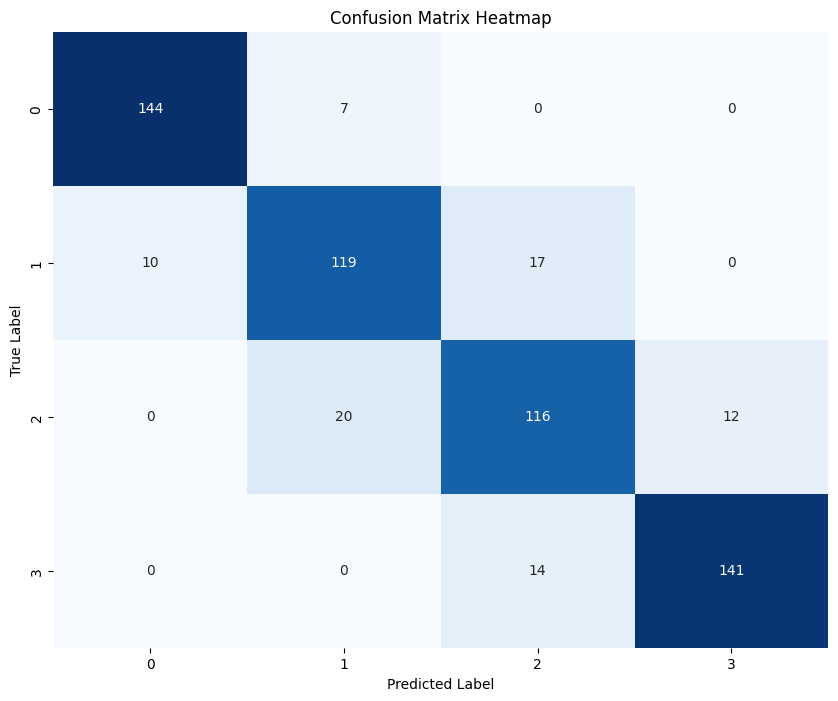

In [115]:
from matplotlib import pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [116]:
import joblib

print(joblib.dump(model, 'mobile_app.pkl'))

['mobile_app.pkl']
